In [1]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt

In [2]:
rate1 = 0.8
rate2 = 0.4
window = 100

In [3]:
spike1 = sample_poisson_process(rate=rate1, window_size=window)
spike2 = sample_poisson_process(rate=rate2, window_size=window)

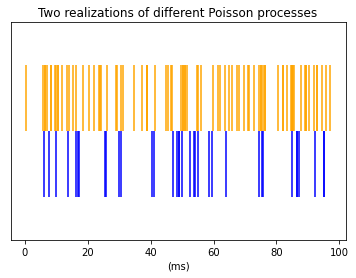

In [4]:
plt.title("Two realizations of different Poisson processes")
plt.eventplot([spike2, spike1], color=('blue', 'orange'))
plt.yticks([])
plt.xlabel("(ms)")
plt.show()

### Validation

Empirical distances:

In [5]:
n = 100, 1000, 1E+4, 1E+5, 1E+6

order1 = 4
order2 = 7

means = []
stes = []

for k in n:
    empirical_mean = []
    for i in range(int(k)):

        spike1 = sample_poisson_process(rate=rate1, window_size=window)[order1-1]
        spike2 = sample_poisson_process(rate=rate2, window_size=window)[order2-1]

        empirical_mean.append(np.abs(spike1-spike2)) # a partial distance of Wasserstein distance between spike1 and spike2.
    
    means.append(np.mean(empirical_mean))
    stes.append(np.std(empirical_mean)/np.sqrt(k))
means = np.asarray(means)
stes = np.asarray(stes)

Derivations:

In [6]:
derived = exp_was_dist(order1, order2, rate1, rate2)

In [7]:
derived

12.577478026723554

result:

<Figure size 360x216 with 0 Axes>

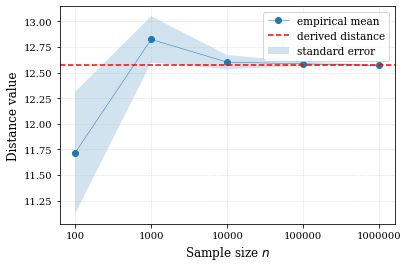

In [17]:
plt.rc('font', family='serif')

xtick = [i for i in range(len(n))]

plt.figure(figsize=(5,3))
plt.figure(facecolor='white')
plt.plot(means, marker='o', alpha=1, linewidth=0.5, label='empirical mean')
plt.fill_between(xtick , means-stes, means+stes, alpha=0.2, label='standard error')
plt.axhline(y=derived, linestyle='--', color='red', label='derived distance')

plt.xlabel(r'Sample size $n$', fontsize=12)
plt.ylabel(r'Distance value', fontsize=12)
plt.grid(True, linewidth=.5, alpha=0.5, linestyle='--')
plt.legend(fontsize=10.5)
plt.xticks(xtick, labels = [str(int(i)) for i in  n])
plt.savefig('./Validation.png', bbox_inches="tight", dpi=300)
plt.show()

rate encoding in the expectation:

In [13]:
order = 4
rates = np.arange(2, 11) * 0.1
encodings = []

In [14]:
rate1 = 0.6
for rate2 in rates:
    encodings.append(exp_was_dist(order, order, rate1, rate2, scale=True))

<Figure size 360x216 with 0 Axes>

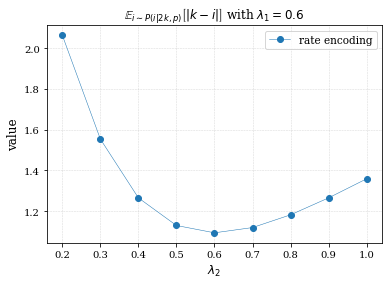

In [15]:
plt.rc('font', family='serif')

xtick = [i for i in range(len(rates))]

plt.figure(figsize=(5,3))
plt.figure(facecolor='white')
plt.title(r'$\mathbb{E}_{i \sim P(i|2k,p)}\left[|k - i|\right]$ with $\lambda_1=0.6$')

plt.plot(encodings, marker='o', alpha=1, linewidth=0.5, label='rate encoding')

plt.xlabel(r'$\lambda_2$', fontsize=12)
plt.ylabel(r'value', fontsize=12)
plt.grid(True, linewidth=.5, alpha=0.5, linestyle='--')
plt.legend(fontsize=10.5)
plt.xticks(xtick, labels = [str(round(rate,1)) for rate in rates])
plt.savefig('./Validation_rate_encoding.png', bbox_inches="tight", dpi=300)
plt.show()